In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')


In [29]:
# N = 0
# cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
# target_col = cols[N % 7]
target_col = 'Daily_Usage_Hours'

ЧАСТЬ I: АНАЛИЗ ДАННЫХ
Характеристики для столбца 'Daily_Usage_Hours':
Среднее: 5.0207
Дисперсия: 3.8279
Мода: 4.4000
Медиана: 5.0000
Квантиль 0.25: 3.7000
Квантиль 0.5: 5.0000
Квантиль 0.75: 6.4000
Асимметрия: 0.0162
Эксцесс: -0.1208
Интерквартильный размах: 2.7000


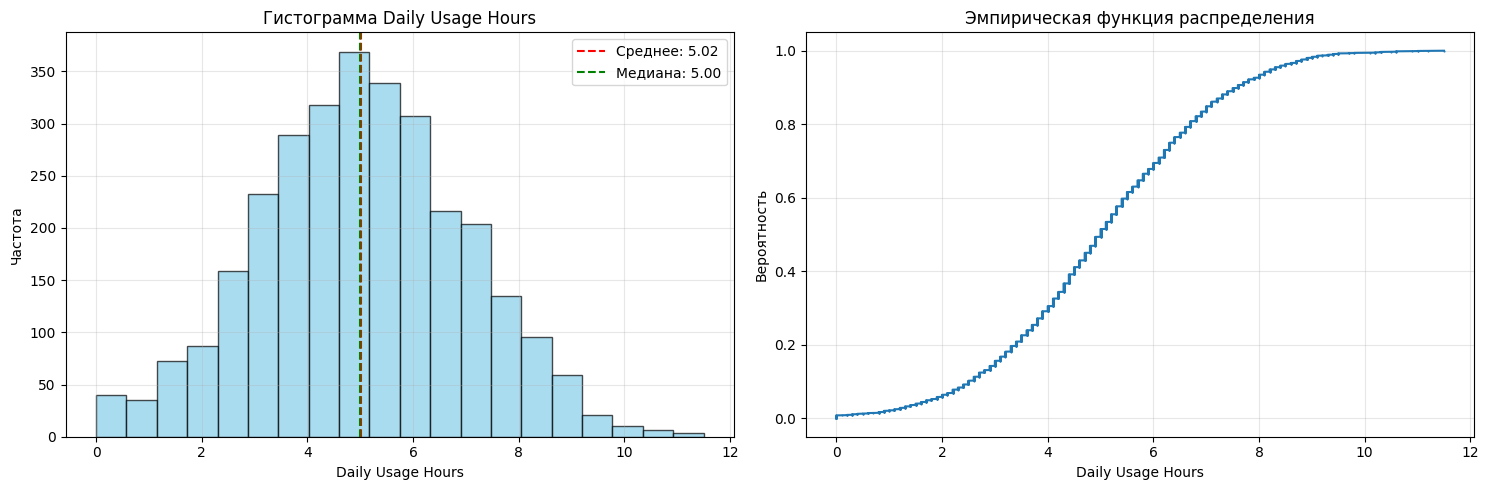

In [30]:
data = df[target_col]

print("="*60)
print("ЧАСТЬ I: АНАЛИЗ ДАННЫХ")
print("="*60)

mean_val = data.mean()
variance_val = data.var()
mode_val = data.mode()[0]
median_val = data.median()
quantile_25 = data.quantile(0.25)
quantile_50 = data.quantile(0.5)
quantile_75 = data.quantile(0.75)
skewness_val = data.skew()
kurtosis_val = data.kurtosis()
iqr_val = quantile_75 - quantile_25

print(f"Характеристики для столбца '{target_col}':")
print(f"Среднее: {mean_val:.4f}")
print(f"Дисперсия: {variance_val:.4f}")
print(f"Мода: {mode_val:.4f}")
print(f"Медиана: {median_val:.4f}")
print(f"Квантиль 0.25: {quantile_25:.4f}")
print(f"Квантиль 0.5: {quantile_50:.4f}")
print(f"Квантиль 0.75: {quantile_75:.4f}")
print(f"Асимметрия: {skewness_val:.4f}")
print(f"Эксцесс: {kurtosis_val:.4f}")
print(f"Интерквартильный размах: {iqr_val:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Среднее: {mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='--', label=f'Медиана: {median_val:.2f}')
axes[0].set_xlabel('Daily Usage Hours')
axes[0].set_ylabel('Частота')
axes[0].set_title('Гистограмма Daily Usage Hours')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

sorted_data = np.sort(data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, y, marker='.', linestyle='-', markersize=1)
axes[1].set_xlabel('Daily Usage Hours')
axes[1].set_ylabel('Вероятность')
axes[1].set_title('Эмпирическая функция распределения')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ЧАСТЬ II: ПРОВЕРКА НА НОРМАЛЬНОСТЬ
Критерий хи-квадрат:
Статистика: 8.4136
p-value: 0.4931
Степени свободы: 9
Для 9 степеней свободы критическое значение при α=0.05 равно 16.92

Критерий асимметрии и эксцесса:
Z-асимметрия: 0.3624, p-value: 0.7171
Z-эксцесс: -1.3720, p-value: 0.1701


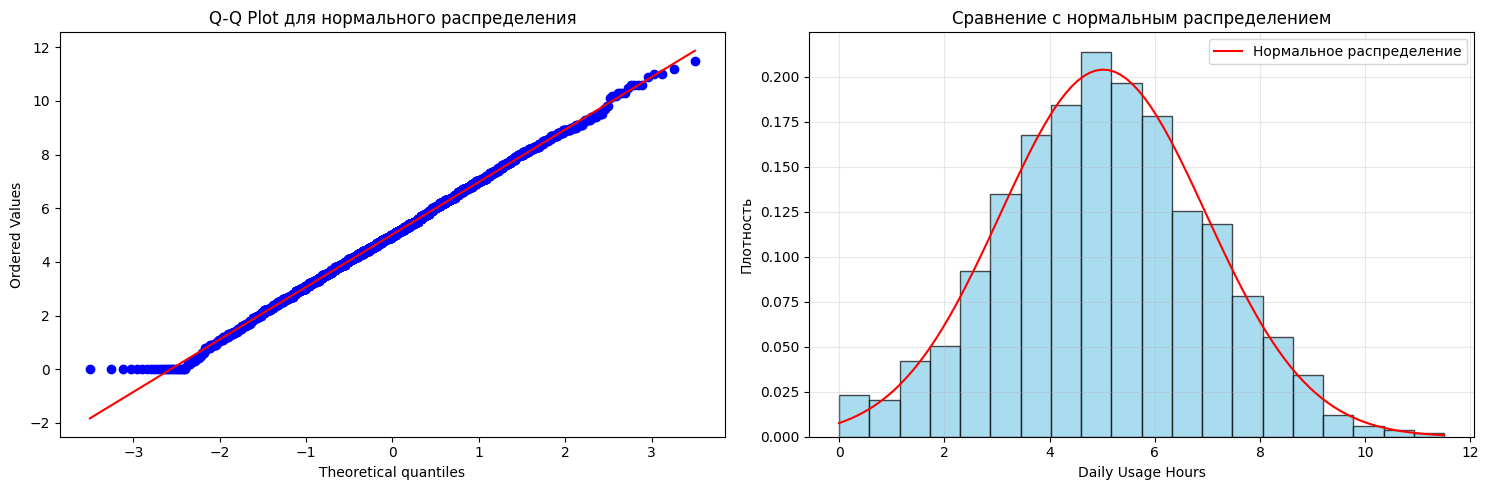


Выводы по нормальности (α=0.05):
Критерий хи-квадрат: Нормальное
Критерий асимметрии: Нормальное
Критерий эксцесса: Нормальное


In [31]:
print("="*60)
print("ЧАСТЬ II: ПРОВЕРКА НА НОРМАЛЬНОСТЬ")
print("="*60)

def chi_square_normality_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    k = int(1 + 3.322 * np.log10(n))
    percentiles = np.linspace(0, 100, k+1)
    boundaries = np.percentile(data, percentiles)
    
    observed, _ = np.histogram(data, boundaries)
    
    expected = []
    for i in range(len(boundaries)-1):
        prob = (stats.norm.cdf(boundaries[i+1], mean, std) - 
                stats.norm.cdf(boundaries[i], mean, std))
        expected.append(prob * n)
    
    expected = np.array(expected)
    
    chi2_stat = np.sum((observed - expected)**2 / expected)
    df = k - 3  
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    
    return chi2_stat, p_value, df

chi2_stat, p_value_chi2, df0 = chi_square_normality_test(data)
print(f"Критерий хи-квадрат:")
print(f"Статистика: {chi2_stat:.4f}")
print(f"p-value: {p_value_chi2:.4f}")
print(f"Степени свободы: {df0}")
print(f"Для 9 степеней свободы критическое значение при α=0.05 равно 16.92")

def skewness_kurtosis_test(data, alpha=0.05):
    n = len(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    se_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))
    
    z_skew = skewness / se_skew
    z_kurt = kurtosis / se_kurt
    
    p_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))
    p_kurt = 2 * (1 - stats.norm.cdf(abs(z_kurt)))
    
    return z_skew, p_skew, z_kurt, p_kurt

z_skew, p_skew, z_kurt, p_kurt = skewness_kurtosis_test(data)
print(f"\nКритерий асимметрии и эксцесса:")
print(f"Z-асимметрия: {z_skew:.4f}, p-value: {p_skew:.4f}")
print(f"Z-эксцесс: {z_kurt:.4f}, p-value: {p_kurt:.4f}")


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

stats.probplot(data, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot для нормального распределения')

x = np.linspace(data.min(), data.max(), 100)
pdf_norm = stats.norm.pdf(x, data.mean(), data.std())
axes[1].hist(data, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].plot(x, pdf_norm, 'r-', label='Нормальное распределение')
axes[1].set_xlabel('Daily Usage Hours')
axes[1].set_ylabel('Плотность')
axes[1].set_title('Сравнение с нормальным распределением')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


alpha = 0.05
is_normal_chi2 = p_value_chi2 > alpha
is_normal_skew = p_skew > alpha
is_normal_kurt = p_kurt > alpha

print(f"\nВыводы по нормальности (α={alpha}):")
print(f"Критерий хи-квадрат: {'Нормальное' if is_normal_chi2 else 'Не нормальное'}")
print(f"Критерий асимметрии: {'Нормальное' if is_normal_skew else 'Не нормальное'}")
print(f"Критерий эксцесса: {'Нормальное' if is_normal_kurt else 'Не нормальное'}")

In [32]:
print("="*60)
print("ЧАСТЬ III: ОБРАБОТКА ДАННЫХ")
print("="*60)

print("АНАЛИЗ НЕОБХОДИМОСТИ ПРЕОБРАЗОВАНИЙ:")
print("Все критерии нормальности показали, что данные уже нормально распределены:")
print("- Критерий хи-квадрат: p-value = 0.4931 > 0.05 ✓")
print("- Критерий асимметрии: p-value = 0.7171 > 0.05 ✓") 
print("- Критерий эксцесса: p-value = 0.1701 > 0.05 ✓")
print("- Асимметрия близка к нулю (0.0162) ✓")
print("- Эксцесс близок к нулю (-0.1208) ✓")

print("\nВЫВОД: Данные уже имеют нормальное распределение.")
print("Дополнительные преобразования не требуются.")


ЧАСТЬ III: ОБРАБОТКА ДАННЫХ
АНАЛИЗ НЕОБХОДИМОСТИ ПРЕОБРАЗОВАНИЙ:
Все критерии нормальности показали, что данные уже нормально распределены:
- Критерий хи-квадрат: p-value = 0.4931 > 0.05 ✓
- Критерий асимметрии: p-value = 0.7171 > 0.05 ✓
- Критерий эксцесса: p-value = 0.1701 > 0.05 ✓
- Асимметрия близка к нулю (0.0162) ✓
- Эксцесс близок к нулю (-0.1208) ✓

ВЫВОД: Данные уже имеют нормальное распределение.
Дополнительные преобразования не требуются.


ЧАСТЬ IV: АНАЛИЗ ПО ГРУППАМ School_Grade
Статистика по группам:
                mean     var  count
School_Grade                       
10th          4.9776  3.8126    487
11th          5.0618  3.6352    479
12th          4.9369  3.7356    529
7th           5.0771  3.8833    497
8th           5.0664  4.0095    482
9th           5.0122  3.9127    526


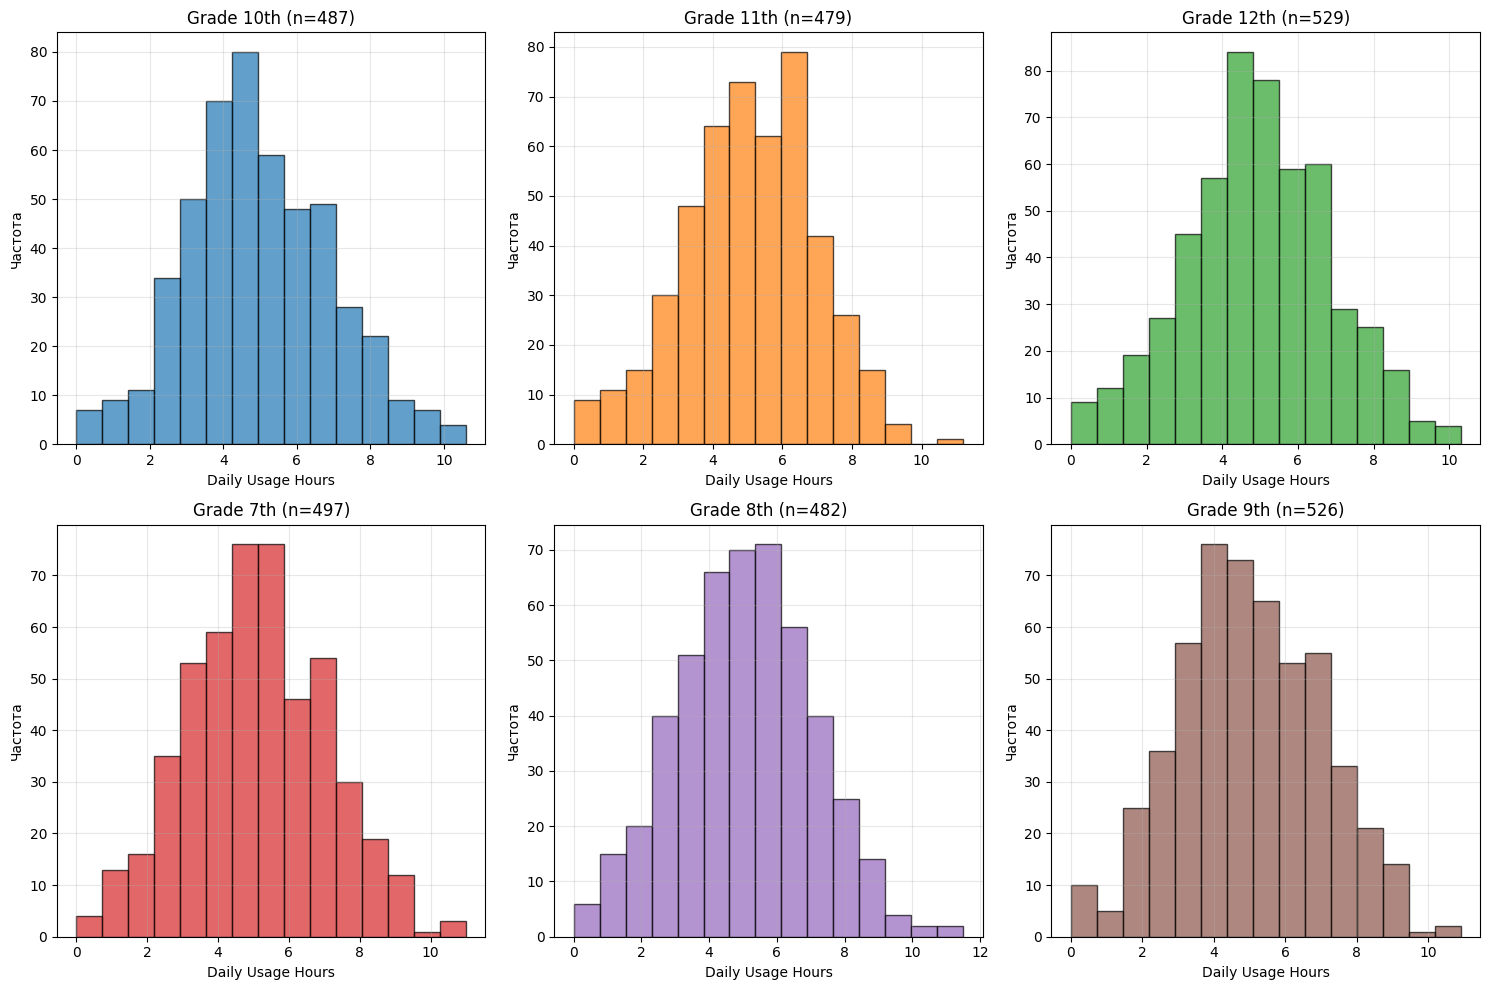


ВЫВОД: Данные в разных группах примерно одинаковы.
Соответственно, количество времени, проведенного в телефоне, не сильно меняется в зависимости от возраста.


In [33]:
print("="*60)
print("ЧАСТЬ IV: АНАЛИЗ ПО ГРУППАМ School_Grade")
print("="*60)

grouped = df.groupby('School_Grade')[target_col]

group_stats = grouped.agg(['mean', 'var', 'count']).round(4)
print("Статистика по группам:")
print(group_stats)

grades = sorted(df['School_Grade'].unique())
n_grades = len(grades)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, grade in enumerate(grades):
    if i < len(axes):
        grade_data = df[df['School_Grade'] == grade][target_col]
        axes[i].hist(grade_data, bins=15, alpha=0.7, color=f'C{i}', edgecolor='black')
        axes[i].set_title(f'Grade {grade} (n={len(grade_data)})')
        axes[i].set_xlabel('Daily Usage Hours')
        axes[i].set_ylabel('Частота')
        axes[i].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

print("\nВЫВОД: Данные в разных группах примерно одинаковы.")
print("Соответственно, количество времени, проведенного в телефоне, не сильно меняется в зависимости от возраста.")